In [2]:
%pylab inline
import pandas as pd
from scipy.stats import sem, t, norm

Populating the interactive namespace from numpy and matplotlib


# Examining the behavior of Confidence Intervals
Let's set some parameters, sample some data from a normal distribution.  We will construct the sample mean and see how confidence intervals generated from the sample stack up against the actual mean.

In [42]:
mu = 5
s2 = 3
alpha = 0.95
sample_size = 160
num_samples = 200
data = normal(mu, s2, [num_samples, sample_size])

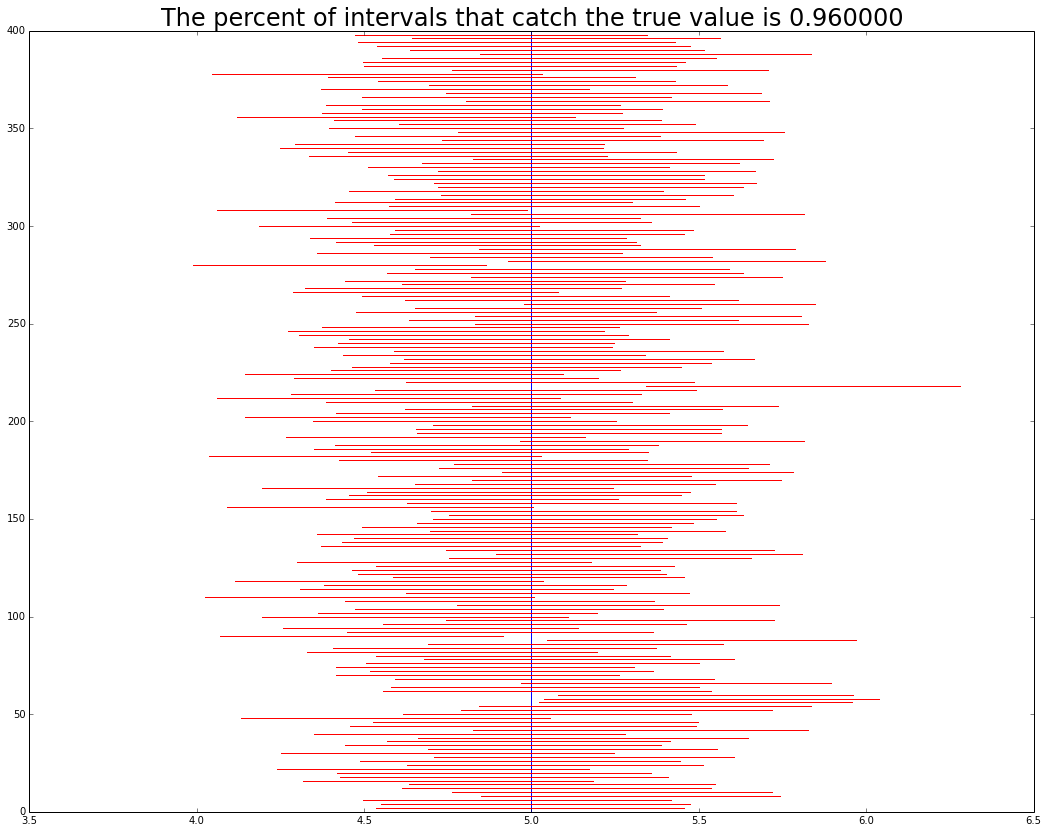

In [43]:
figsize(18, 14)
inside = 0
outside = 0

i = 0
for d in data:
    M, SE = mean(d), std(d)/sqrt(len(d)) #sem(d) #sem, standard error of the mean, is a built in function
    a, b = norm.interval(alpha, M, SE)
    if a < mu < b:
        inside += 1
    else:
        outside += 1
        bad = d
        bad_a, bad_b = a, b
    plot([a, b], [2*i, 2*i], 'r-')
    i+=1
vlines(mu, 0, 2*num_samples, 'b')

title("The percent of intervals that catch the true value is %f" % (float(inside)/(inside+outside)), size=24)
    

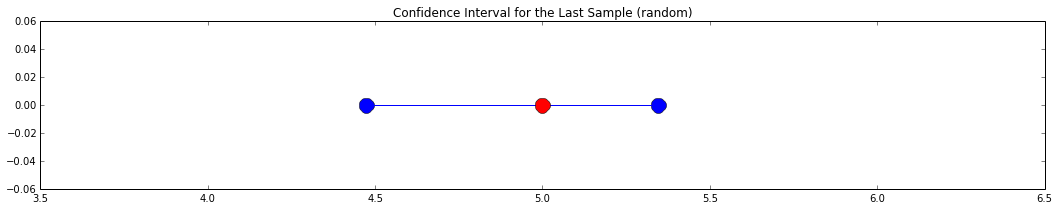

In [44]:
figsize(18,3)
plot([a, b], [0, 0], 'bo', markersize=15)
plot([a, b], [0, 0], 'b-')
plot(mu, 0, 'ro', markersize=15)
xlim(3.5,6.5)
title("Confidence Interval for the Last Sample (random)")

[ 3.88596827  2.35581738  6.58727357  2.12289709  5.73437707]
The 95% confidence interval for this sample of 160 points is (4.061613, 4.985790)


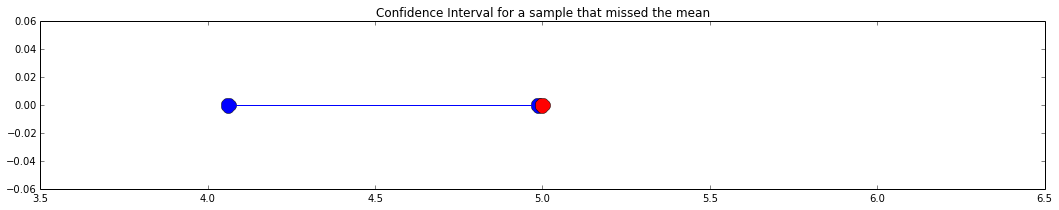

In [45]:
figsize(18,3)
plot([bad_a, bad_b], [0, 0], 'bo', markersize=15)
plot([bad_a, bad_b], [0, 0], 'b-')
plot(mu, 0, 'ro', markersize=15)
xlim(3.5, 6.5)
title("Confidence Interval for a sample that missed the mean")
print bad[:5]
print "The 95%% confidence interval for this sample of %d points is (%f, %f)" % (len(bad), bad_a, bad_b)